In [1]:
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colormap
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
import pandas as pd

In [4]:
# Import data portland_final.csv
df = pd.read_csv("Final_merged_city_portland.csv")

In [5]:
df.head()

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,...,Empratio,estabratio,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio
0,2432,41051010402,POINT (-122.3356996936241 45.48566422279789),2010,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2601.0,5717.0,3699.0,294.0,356.0,...,0.0,0.0,0.391464,0.091307,0.490196,0.009612,0.019608,0.891580,0.005767,0.014994
1,2435,41051010402,POINT (-122.3356996936241 45.48566422279789),2011,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2826.0,6037.0,4024.0,368.0,476.0,...,0.0,0.0,0.405831,0.108001,0.305970,0.014508,0.047417,0.866596,0.030432,0.009908
2,2438,41051010402,POINT (-122.3356996936241 45.48566422279789),2012,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2868.0,6153.0,4090.0,369.0,507.0,...,0.0,0.0,0.393954,0.109052,0.266667,0.011158,0.041841,0.857043,0.033473,0.004533
3,2441,41051010402,POINT (-122.3356996936241 45.48566422279789),2013,MULTIPOLYGON (((-122.3868792758254 45.51902980...,2876.0,6022.0,3931.0,296.0,404.0,...,0.0,0.0,0.366490,0.108602,0.321739,0.012865,0.039986,0.858832,0.025730,0.012517
4,2444,41051010402,POINT (-122.335683996136 45.48565935229686),2014,MULTIPOLYGON (((-122.3868792758254 45.51902980...,3078.0,6181.0,4094.0,316.0,457.0,...,0.0,0.0,0.387316,0.108720,0.264368,0.007472,0.028265,0.875569,0.016244,0.023392


In [34]:
df.shape

(2608, 24)

In [6]:
from shapely import wkt
df["geometry"] = df["geometry"].apply(wkt.loads)
df["centroid"] = df["centroid"].apply(wkt.loads)

In [7]:
dfshp = gp.GeoDataFrame(df, geometry = "geometry")

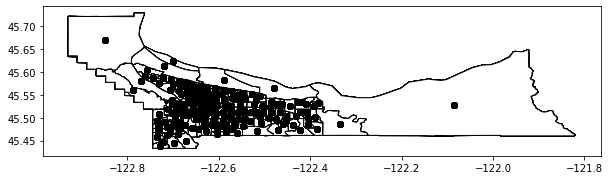

In [8]:
fig, ax = plt.subplots(figsize = (10, 10))
dfshp.plot(ax=ax, **{"edgecolor": "black", "facecolor": "white"})
dfshp.centroid.plot(ax = ax, c = "black")
plt.savefig("sd_shp")
plt.show()

## Establishment size

In [44]:
g_y = dfshp["estabratio"].values.reshape((-1, 1))

In [45]:
g_X =dfshp[["pop", "income", "edut", "ratio_65", "bus_ratio", "public_ratio", "walked_ratio"]].values

In [46]:
def getXY(pt):
    return (pt.x, pt.y)
x,y = [list(t) for t in zip(*map(getXY, dfshp["centroid"]))]

In [47]:
g_coords = g_coords = list(zip(x, y))

In [48]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
gwr_bw = gwr_selector.search()

In [51]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)

In [52]:
gwr_results = gwr_model.fit()

In [53]:
print(gwr_results.resid_ss)

20676313.862497076


In [54]:
dfshp["R2"] = gwr_results.localR2

In [55]:
dfshp["R2"] = abs(dfshp["R2"])
dfshp2 = dfshp[dfshp["R2"] <= 1]

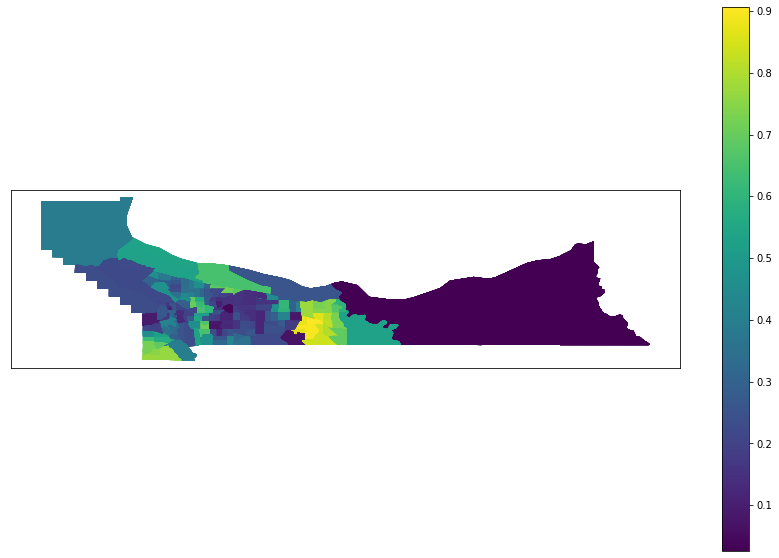

<Figure size 1440x720 with 0 Axes>

In [56]:
#Local model fit
dfshp2.plot("R2", figsize = (15,10), legend = True)
ax = plt.gca()
plt.figure(figsize=(20,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig("local_R2_est")
plt.show()

In [57]:
print(gwr_results.R2)

0.47452991458330573


## Employment size

In [24]:
g_y = dfshp["Empratio"].values.reshape((-1, 1))

In [25]:
g_X =dfshp[["pop", "income", "edut", "ratio_65", "bus_ratio", "public_ratio", "walked_ratio"]].values

In [26]:
def getXY(pt):
    return (pt.x, pt.y)
x,y = [list(t) for t in zip(*map(getXY, dfshp["centroid"]))]

In [27]:
g_coords = g_coords = list(zip(x, y))

In [28]:
gwr_selector = Sel_BW(g_coords, g_y, g_X)

In [29]:
gwr_bw = gwr_selector.search()

In [30]:
gwr_model = GWR(g_coords, g_y, g_X, gwr_bw)
gwr_results = gwr_model.fit()
print(gwr_results.resid_ss)

11346442077.328056


In [31]:
dfshp["R2"] = gwr_results.localR2
dfshp["R2"] = abs(dfshp["R2"])
dfshp2 = dfshp[dfshp["R2"] <= 1]

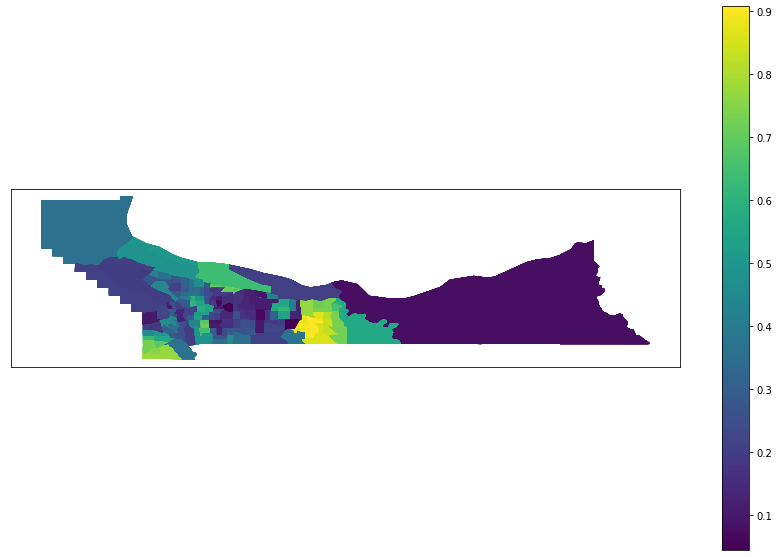

<Figure size 1440x720 with 0 Axes>

In [43]:
#Local model fit
dfshp2.plot("R2", figsize = (15,10), legend = True)
ax = plt.gca()
plt.figure(figsize=(20,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.savefig("local_R2_emp")
plt.show()

In [33]:
print(gwr_results.R2)

0.45747209217396634
